In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('House Price India.csv')
print(df.head())

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
selection = ["living area", "number of bedrooms", "number of bathrooms", "Price"]
df = df[selection]

print(df.head())

   living area  number of bedrooms  number of bathrooms     Price
0       3310.0                 4.0                 2.50  838000.0
1       2710.0                 3.0                 2.00  805000.0
2       2600.0                 3.0                 2.50  790000.0
3       3660.0                 5.0                 3.25  785000.0
4       2240.0                 3.0                 1.75  750000.0


In [17]:
null_values = df[selection].isnull().sum()
print(null_values)

living area            0
number of bedrooms     0
number of bathrooms    0
Price                  0
dtype: int64


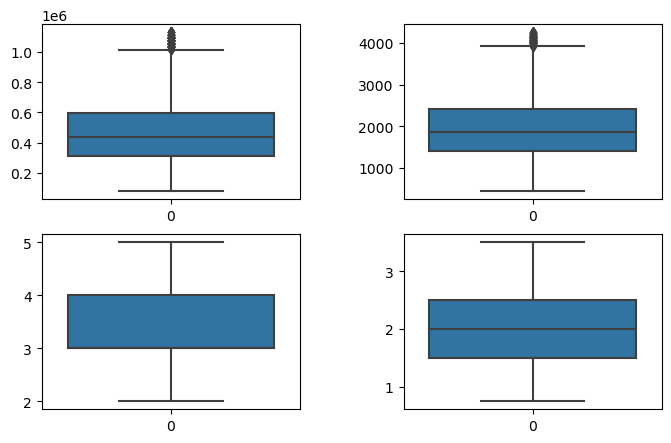

In [18]:
fig, axs = plt.subplots(2,2, figsize = (8,5))
plt1 = sns.boxplot(df['Price'], ax = axs[0,0])
plt2 = sns.boxplot(df['living area'], ax = axs[0,1])
plt3 = sns.boxplot(df['number of bedrooms'], ax = axs[1,0])
plt1 = sns.boxplot(df['number of bathrooms'], ax = axs[1,1])
plt.subplots_adjust(wspace=0.4)

In [19]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5*IQR) & (column <= Q3 + 1.5*IQR)]

df = df.apply(remove_outliers, axis=0)

In [20]:
null_values = df.isnull().sum()
print(null_values)

df = df.dropna()
df.reset_index(drop=True, inplace=True)

living area            104
number of bedrooms       0
number of bathrooms      0
Price                  144
dtype: int64


In [21]:
null_values = df.isnull().sum()
print(null_values)

living area            0
number of bedrooms     0
number of bathrooms    0
Price                  0
dtype: int64


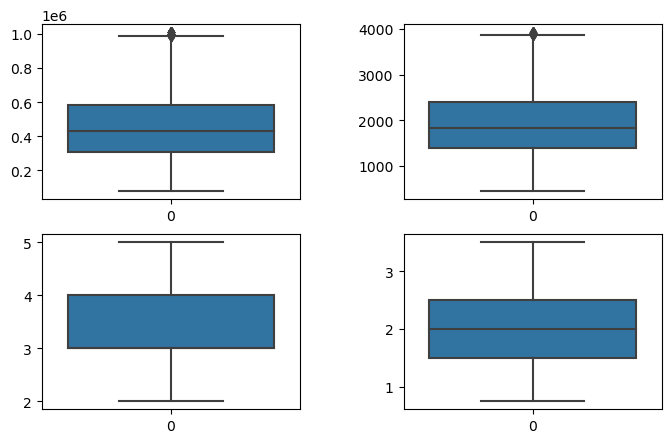

In [22]:
fig, axs = plt.subplots(2,2, figsize = (8,5))
plt1 = sns.boxplot(df['Price'], ax = axs[0,0])
plt2 = sns.boxplot(df['living area'], ax = axs[0,1])
plt3 = sns.boxplot(df['number of bedrooms'], ax = axs[1,0])
plt1 = sns.boxplot(df['number of bathrooms'], ax = axs[1,1])
plt.subplots_adjust(wspace=0.4)

In [23]:
X = df[['living area', 'number of bedrooms', 'number of bathrooms']]
y = df['Price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df.head()

,living area,number of bedrooms,number of bathrooms
10944,0.837209,0.666667,0.636364
12784,0.526163,0.333333,0.363636
2251,0.930233,1.000000,1.000000
3677,0.299419,0.333333,0.272727
8132,0.438953,0.000000,0.636364


In [27]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaled_df.head()

,living area,number of bedrooms,number of bathrooms
8445,0.357558,0.333333,0.636364
3811,0.165698,0.000000,0.090909
11053,0.331395,0.000000,0.545455
833,0.813953,1.000000,0.363636
3846,0.168605,0.333333,0.363636


In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test_scaled)

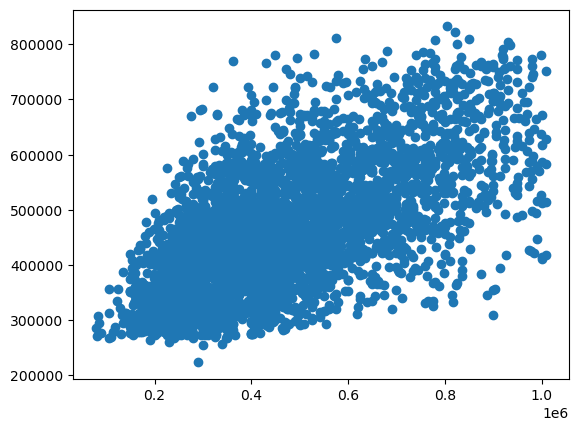

In [30]:
plt.scatter(y_test,y_pred)

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 23335726573.98436
Root Mean Squared Error: 152760.35668321923
R^2 Score: 0.388560127195952
